In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

#### QUESTION 1

In [2]:
def voltage_diff(leak_potantial, voltage, memb_resistance_i_e, tau_m, synapse_current = 0):
    return (leak_potential - voltage + memb_resistance_i_e + synapse_current) / tau_m

In [3]:
leak_potential = -70     # E_L (mV)
membrane_resistance = 10 # R_m (mV/nA)
i_e = 3.1                # Constant Current (nA)
tau_m = 10 #* ms         # membrane time constant (ms)

v_reset = -70            # (mV)
v_threshold = -40        # (mV)

args = {
    'leak_potential': leak_potential,
    'memb_resistance': membrane_resistance,
    'i_e': i_e,
    'tau_m': tau_m
}

voltage_diff(leak_potential, v_reset, membrane_resistance * i_e, tau_m)

3.1

In [4]:
def q1_euler(args, v_reset, v_threshold, time=1000, step=0.25):
    ''' v_*(mV), time(ms), step(ms)'''

    leak_potential  = args['leak_potential']
    memb_resistance = args['memb_resistance']
    i_e             = args['i_e']
    tau_m           = args['tau_m']
    
    volts = []
    time = np.linspace(0, time, int(time / step))
    v = v_reset
    for i in time:
        v = v + step * voltage_diff(leak_potential, v, memb_resistance * i_e, tau_m)
        
        volts.append(v)

        if (v >= v_threshold):
            v = v_reset

    return time, np.array(volts)

In [5]:
time, volts = q1_euler(args, v_reset, v_threshold)
print(time.shape)
print(len(volts))

(4000,)
4000


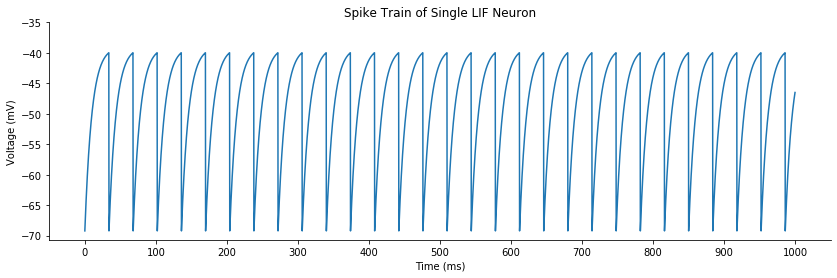

In [6]:
def plot_q1(title, filename, time, volts):
    fig = plt.figure(figsize=(14,4))
    ax = fig.add_subplot()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(title)
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Voltage (mV)")
    ax.plot(time, volts)
    ax.set_yticks(range(-70,-30,5))
    ax.set_xticks(range(0,1001,100))
    fig.savefig(f"plots/{filename}.png", bbox_inches='tight', pad_inches=0.2, dpi=100)
title = "Spike Train of Single LIF Neuron"
plot_q1(title, 'a_q1', time, volts)

#### QUESTION 2

In [7]:
def q2_euler(args_v, args_s, v_reset, v_threshold, time=1000, step=0.25):
    ''' time(ms), step(ms)'''

    leak_potential  = args_v['leak_potential']
    r_m_i_e         = args_v['memb_resistance_i_e']
    tau_m           = args_v['tau_m']

    reversal_potential      = args_s['reversal_potential']
    memb_resistance_g_bar   = args_s['memb_resistance_g_bar']
    delta_s                 = args_s['delta_s']
    tau_s                   = args_s['tau_s']

    volts1 = []; volts2 = []
    time = np.linspace(0, time, int(time / step))
    v1_init = random.randint(v_reset, v_threshold)
    v2_init = random.randint(v_reset, v_threshold)
    v1 = v1_init
    v2 = v2_init
    print("Initializing: v1", v1, ", v2", v2)

    s1_v = 0;  s2_v = 0                                 # Current synapses
    for i in time:
        s1_v = s1_v - (s1_v * step) / tau_s
        s2_v = s2_v - (s2_v * step) / tau_s

        r_m_i_s1 = s1_v * memb_resistance_g_bar * (reversal_potential - v2)
#         print("s1 ", s1_v, r_m_i_s1, end=' ')

        r_m_i_s2 = s2_v * memb_resistance_g_bar * (reversal_potential - v1)
#         print("s2 ", s2_v, r_m_i_s2, end=' ')

        v1 = v1 + step * voltage_diff(leak_potential, v1, r_m_i_e, tau_m, r_m_i_s1)        
        v2 = v2 + step * voltage_diff(leak_potential, v2, r_m_i_e, tau_m, r_m_i_s2)
        
        volts1.append(v1)
        volts2.append(v2)
        if (v1 > v_threshold):
            v1 = v_reset
            s1_v += delta_s
        
        if (v2 > v_threshold):
            v2 = v_reset
            s2_v += delta_s

    return time, int(v1_init), volts1, v2_init, volts2

#### Inhibitory Synapse

In [8]:
args_voltage = {
    'leak_potential': -70,     # E_L
    'memb_resistance_i_e': 18, # R_m * I_e
    'tau_m': 20                # Membrane Time Constant
}
args_synapse = {
    'reversal_potential': -80,      # E_s -> Inhibitory
    'memb_resistance_g_bar': 0.15, # R_m * G_bar
    'delta_s': 0.5,                
    'tau_s': 10               
}
v_reset = -80
v_threshold = -54
time, v1_init, volts1, v2_init, volts2 = q2_euler(args_voltage, args_synapse, v_reset, v_threshold)
print(time.shape)
print(len(volts1))
print(len(volts2))

Initializing: v1 -71 , v2 -67
(4000,)
4000
4000


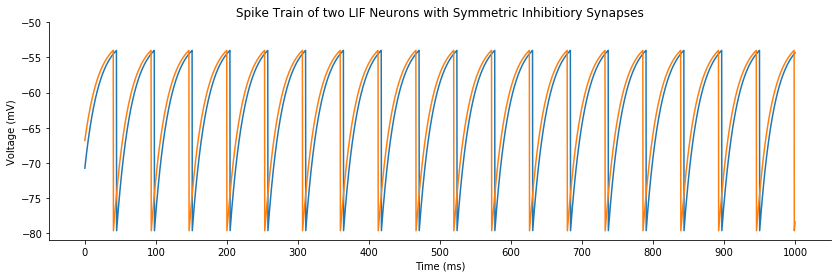

In [9]:
def plot_q2(title_type, time, v1_init, volts1, v2_init, volts2):
    fig = plt.figure(figsize=(14,4))
    ax = fig.add_subplot()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f'Spike Train of two LIF Neurons with Symmetric {title_type} Synapses')
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Voltage (mV)")
    ax.plot(time, volts1)
    ax.plot(time, volts2)
    ax.set_yticks(range(-80,-45,5))
    ax.set_xticks(range(0,1001,100))
    fig.savefig(f"plots/a_q2_{title_type}_{v1_init}_{v2_init}.png",
                bbox_inches='tight', pad_inches=0.2, dpi = 100)
title = 'Inhibitiory'
plot_q2(title, time, v1_init, volts1, v2_init, volts2)

#### Excitatory Synapse

In [10]:
args_synapse['reversal_potential'] = 0
time, v1_init, volts1, v2_init, volts2 = q2_euler(args_voltage, args_synapse, v_reset, v_threshold)

Initializing: v1 -62 , v2 -76


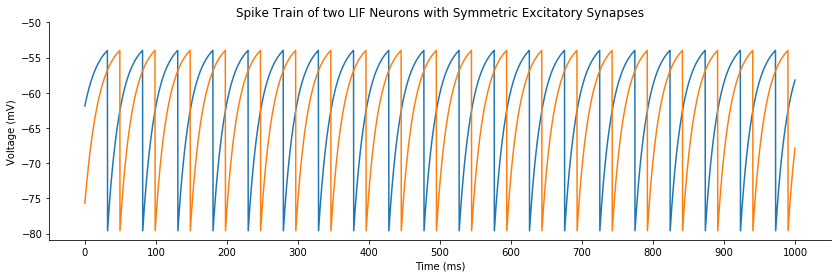

In [11]:
title_type = "Excitatory"
plot_q2(title_type, time, v1_init, volts1, v2_init, volts2)

#### QUESTION 3 (COMSM2127)

In [12]:
args['i_e'] = 2.9
v_reset = -70
v_threshold = -40
time, volts = q1_euler(args, v_reset, v_threshold)

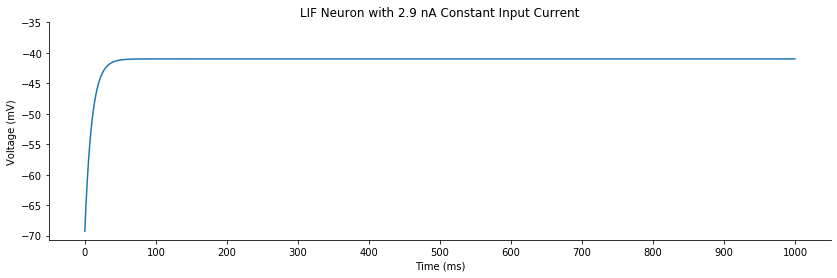

In [13]:
title = "LIF Neuron with 2.9 nA Constant Input Current"
plot_q1(title, "a_q3_2", time, volts)

In [14]:
args = {
    'leak_potential': -70,     # E_L
    'memb_resistance': 10,     # R_m
    'tau_m': 10                # Membrane time constant
}

v_reset = -70
v_threshold = -40

In [15]:
def q3_firing_rates(lower, upper, v_reset, v_threshold):
    currents = np.linspace(lower, upper, num=int(((upper-lower) / 0.1) + 1))
#     print(currents)
    rates = []
    for current in currents:
        args['i_e'] = current
        time, volts = q1_euler(args, v_reset, v_threshold)
        num_spikes = np.count_nonzero(volts >= v_threshold)
        rates.append(num_spikes)
        
    return currents, rates
currents, rates = q3_firing_rates(2.0, 5.0, v_reset, v_threshold)
len(rates)

31

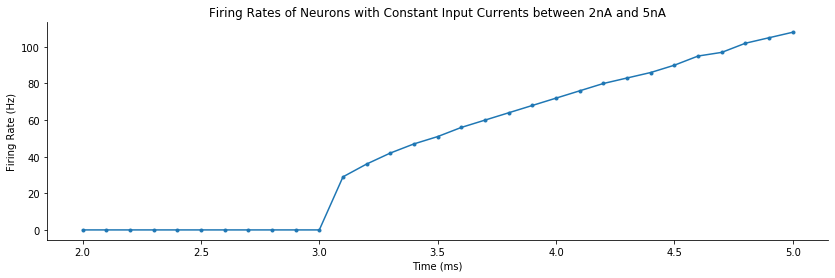

In [16]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(f'Firing Rates of Neurons with Constant Input Currents between 2nA and 5nA')
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Firing Rate (Hz)")
ax.plot(currents, rates, linestyle='-', marker='.')
# ax.set_yticks(range(-80,-45,5))
# ax.set_xticks(range(0,1001,100))
fig.savefig(f"plots/a_q3_firing_rates.png",
            bbox_inches='tight', pad_inches=0.2, dpi = 100)
